In [2]:
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
train_data = MNIST(root="data", train=True, download=True, transform=ToTensor())

test_data = MNIST(root="data", train=False, download=True, transform=ToTensor())

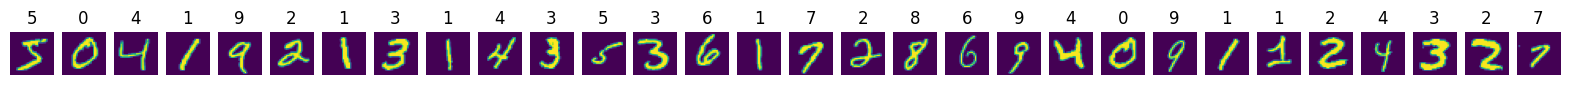

In [4]:
fig, ax = plt.subplots(1, 30)

for i in range(30):
    ax[i].imshow(train_data.data[i])
    ax[i].set_title(train_data.targets[i].item())
    ax[i].axis("off")
fig.set_size_inches(20, 2)

In [5]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10,5  )
        self.conv2 = nn.Conv2d(10, 20, 5)

        self.dropout1 = nn.Dropout()

        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.dropout1(self.conv2(x)), 2))
        x=x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


model = CNN()

In [7]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction="sum").item()
            pred = output.argmax(
                dim=1, keepdim=True
            )  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(
        "\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss, correct, len(test_loader.dataset), 100.0 * correct / len(test_loader.dataset)
        )
    )

In [8]:
def train(epochs, model, loss_fn, optimizer, train_loader):
    for epoch in range(1, epochs + 1):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 100 == 0:
                print(
                    "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                        epoch,
                        batch_idx * len(data),
                        len(train_loader.dataset),
                        100.0 * batch_idx / len(train_loader),
                        loss.item(),
                    )
                )
        test(model, test_loader)

In [13]:
optimizer =torch.optim.Adam(model.parameters(), lr=0.01)

loss_fn = nn.CrossEntropyLoss()

train(2, model, loss_fn, optimizer, train_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.212569
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.133035
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.095938
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.158771
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.294292
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.252149
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.100917
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.468943
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.532054
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.383323

Test set: Average loss: 0.1064, Accuracy: 9722/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.213133
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.113970
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.151193
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.398150
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.134392
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.299882
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.223077
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.238137
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.221504
T

In [14]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")


Saved PyTorch Model State to model.pth
